In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
data=fetch_california_housing()

In [20]:
df=pd.DataFrame(columns=data.feature_names,data=data.data)
df['target']=data.target
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [21]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
rf=RandomForestRegressor(n_estimators=500,n_jobs=-1)

In [24]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1)

In [25]:
y_pred=rf.predict(X_test)

In [27]:
print('R2_score is ',r2_score(y_test,y_pred))

R2_score is  0.8073448569290719


In [32]:
rf.feature_importances_

array([0.5259195 , 0.05469784, 0.04424293, 0.02951665, 0.03082471,
       0.13822804, 0.08821296, 0.08835736])

In [35]:
for name, score in zip(data.feature_names, rf.feature_importances_):
    print(name,score)

MedInc 0.5259195025810204
HouseAge 0.054697839831460454
AveRooms 0.04424293431351361
AveBedrms 0.029516654111111942
Population 0.030824707037014436
AveOccup 0.13822804313184023
Latitude 0.08821296092465207
Longitude 0.08835735806938673


In [36]:
import seaborn as sns

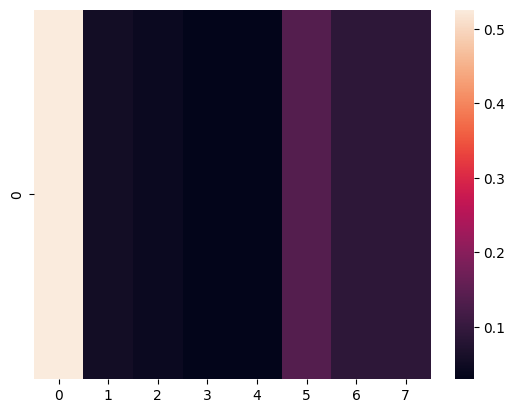

In [42]:
sns.heatmap(rf.feature_importances_.reshape(1,8));